In [49]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# 2a

In [38]:
# Load data
df = pd.read_csv('5000MostVariableGenesWithClusters.csv')

In [53]:
df.tail()

,refinebio_accession_code,CD4,CD8A,KLRC4-KLRK1,CD8B,STXBP2,ADGRG1,GINS3,GZMH,XIST,...,MYADM-AS2,ALDH1A3,NDUFV1-DT,ASCL5,KCNJ12,SPRR4,HSD17B3-AS1,LOC114841035,Group,Cluster
114,SRR7726017,7.544641,0.000000,0.000000,2.802657,6.284985,0.000000,5.020313,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ra non treatment,0
115,SRR7726018,0.000000,7.209779,8.373188,8.040202,6.365506,3.723847,0.711232,4.589354,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ra non treatment,1
116,SRR7726019,0.000000,7.250339,8.480368,8.137742,0.000000,7.954921,1.351413,8.330927,1.752926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ra non treatment,1
117,SRR7726020,0.000000,7.538558,8.621674,7.936845,7.166590,8.835145,1.184257,8.796788,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ra non treatment,3
118,SRR7726021,1.211576,7.331144,8.664808,8.607863,6.416606,1.512522,0.000000,2.548966,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ra non treatment,0


# 2b

In [44]:
# Separate features and labels
X = df.drop(columns=['refinebio_accession_code', 'Group', 'Cluster'])  # Drop irrelevant columns for feature set
y_group = df['Group']  # "Healthy" vs "RA-non treatment"
label_encoder_group = LabelEncoder()
y_group_encoded = label_encoder_group.fit_transform(y_group)  # Encode the 'Group' column

# Split data for "Healthy" vs "RA-non treatment"
X_train, X_test, y_train_group, y_test_group = train_test_split(X, y_group_encoded, test_size=0.3, random_state=56)

knn_group = KNeighborsClassifier(n_neighbors=5)

# 2d

In [45]:
knn_group.fit(X_train, y_train_group)

# Predict on test set
y_pred_group = knn_group.predict(X_test)
print("Assignment 1 Results: Accuracy (Healthy vs RA):", accuracy_score(y_test_group, y_pred_group))
print("Confusion Matrix:\n", confusion_matrix(y_test_group, y_pred_group))
print("Classification Report:\n", classification_report(y_test_group, y_pred_group))

Assignment 1 Results: Accuracy (Healthy vs RA): 0.5555555555555556
Confusion Matrix:
 [[13  6]
 [10  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62        19
           1       0.54      0.41      0.47        17

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.54        36
weighted avg       0.55      0.56      0.55        36



# 2e

In [46]:
# Separate features and labels for Assignment 3 (Cluster prediction)
y_cluster = df['Cluster']  # Cluster category from Assignment 3
label_encoder_cluster = LabelEncoder()
y_cluster_encoded = label_encoder_cluster.fit_transform(y_cluster)  # Encode cluster labels
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X, y_cluster_encoded, test_size=0.3, random_state=56)

# Train and evaluate KNN model for cluster classification (Assignment 3)
knn_cluster = KNeighborsClassifier(n_neighbors=5)
knn_cluster.fit(X_train_cluster, y_train_cluster)

# Predict on test set for cluster classification
y_pred_cluster = knn_cluster.predict(X_test_cluster)
print("\nAssignment 3 Results: Accuracy (Cluster prediction):", accuracy_score(y_test_cluster, y_pred_cluster))
print("Confusion Matrix:\n", confusion_matrix(y_test_cluster, y_pred_cluster))
print("Classification Report:\n", classification_report(y_test_cluster, y_pred_cluster))


Assignment 3 Results: Accuracy (Cluster prediction): 0.8888888888888888
Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0 13  0  0  0]
 [ 1  0  0  0  0]
 [ 0  2  0 10  0]
 [ 0  0  0  1  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.87      1.00      0.93        13
           2       0.00      0.00      0.00         1
           3       0.91      0.83      0.87        12
           4       1.00      0.80      0.89         5

    accuracy                           0.89        36
   macro avg       0.72      0.73      0.72        36
weighted avg       0.87      0.89      0.87        36



C:\Users\madoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\madoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\madoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 3

In [47]:

# Probability predictions for AUC calculation for clusters
# Assuming binary classification for one specific cluster
y_test_cluster_probs = knn_cluster.predict_proba(X_test_cluster)[:, 1]  # Probability for the first cluster

# Define a binary target for AUC (this will depend on your clusters)
# For example, here we assume you're checking for a cluster with encoded value '1'
y_test_cluster_binary = (y_test_cluster == 1).astype(int)  # Adjust according to your clusters

# Calculate AUC for Assignment 3
try:
    auc = roc_auc_score(y_test_cluster_binary, y_test_cluster_probs)
    print("AUC for Cluster model (Assignment 3):", auc)
except ValueError as e:
    print("Error in AUC calculation:", e)

# Example for creating a DataFrame to store model predictions (if needed)
predictions_df = pd.DataFrame({
    'Sample': ['SRR7725764', 'SRR7725765', 'SRR7725768'],  # Replace with actual sample IDs
    'Model_1': [0.3, 0.7, 0.6],  # Example probabilities from Model 1
    'Model_2': [0.4, 0.6, 0.8],  # Example probabilities from Model 2
    'Model_3': [0.2, 0.9, 0.7],  # Example probabilities from Model 3
    'Model_4': [0.3, 0.8, 0.75],  # Example probabilities from Model 4
})

AUC for Cluster model (Assignment 3): 1.0


In [43]:

# Assuming true labels for each sample for each class
true_labels = [0, 1, 1]  # Replace with actual binary labels for AUC calculation

# Calculate AUC for each sample across all models
sample_aucs = []
for i in range(len(predictions_df)):
    sample_probs = predictions_df.iloc[i, 1:].values  # Model probabilities for the current sample
    try:
        auc = roc_auc_score([true_labels[i]] * len(sample_probs), sample_probs)
        sample_aucs.append(auc)
    except ValueError as e:
        print(f"Error calculating AUC for sample {i}: {e}")

print("\nSample-specific AUCs:", sample_aucs)

Error calculating AUC for sample 0: Only one class present in y_true. ROC AUC score is not defined in that case.
Error calculating AUC for sample 1: Only one class present in y_true. ROC AUC score is not defined in that case.
Error calculating AUC for sample 2: Only one class present in y_true. ROC AUC score is not defined in that case.

Sample-specific AUCs: []


# 4

In [48]:
def train_and_evaluate(num_genes):
    # Randomly select the top 'num_genes' columns (genes)
    selected_genes = X_train.columns[:num_genes]
    X_train_selected = X_train[selected_genes]
    X_test_selected = X_test[selected_genes]
    
    # Train the KNN model
    knn_group = KNeighborsClassifier(n_neighbors=5)
    knn_group.fit(X_train_selected, y_train_group)
    
    # Predict on the test set
    y_pred_group_probs = knn_group.predict_proba(X_test_selected)[:, 1]  # Probability of the positive class (RA)
    
    # Calculate AUC
    auc = roc_auc_score(y_test_group, y_pred_group_probs)
    
    return auc

# List of different numbers of genes to test
genes_to_test = [10, 100, 1000, 10000]
results = {}

# Loop through each number of genes and evaluate the model
for num_genes in genes_to_test:
    auc = train_and_evaluate(num_genes)
    results[num_genes] = auc
    print(f"AUC for {num_genes} genes: {auc}")

# Summary of results
print("\nSummary of AUC for different numbers of genes:")
for num_genes, auc in results.items():
    print(f"{num_genes} genes: {auc}")

AUC for 10 genes: 0.5495356037151703
AUC for 100 genes: 0.4814241486068112
AUC for 1000 genes: 0.434984520123839
AUC for 10000 genes: 0.56656346749226

Summary of AUC for different numbers of genes:
10 genes: 0.5495356037151703
100 genes: 0.4814241486068112
1000 genes: 0.434984520123839
10000 genes: 0.56656346749226


# 5

<Figure size 1000x800 with 0 Axes>

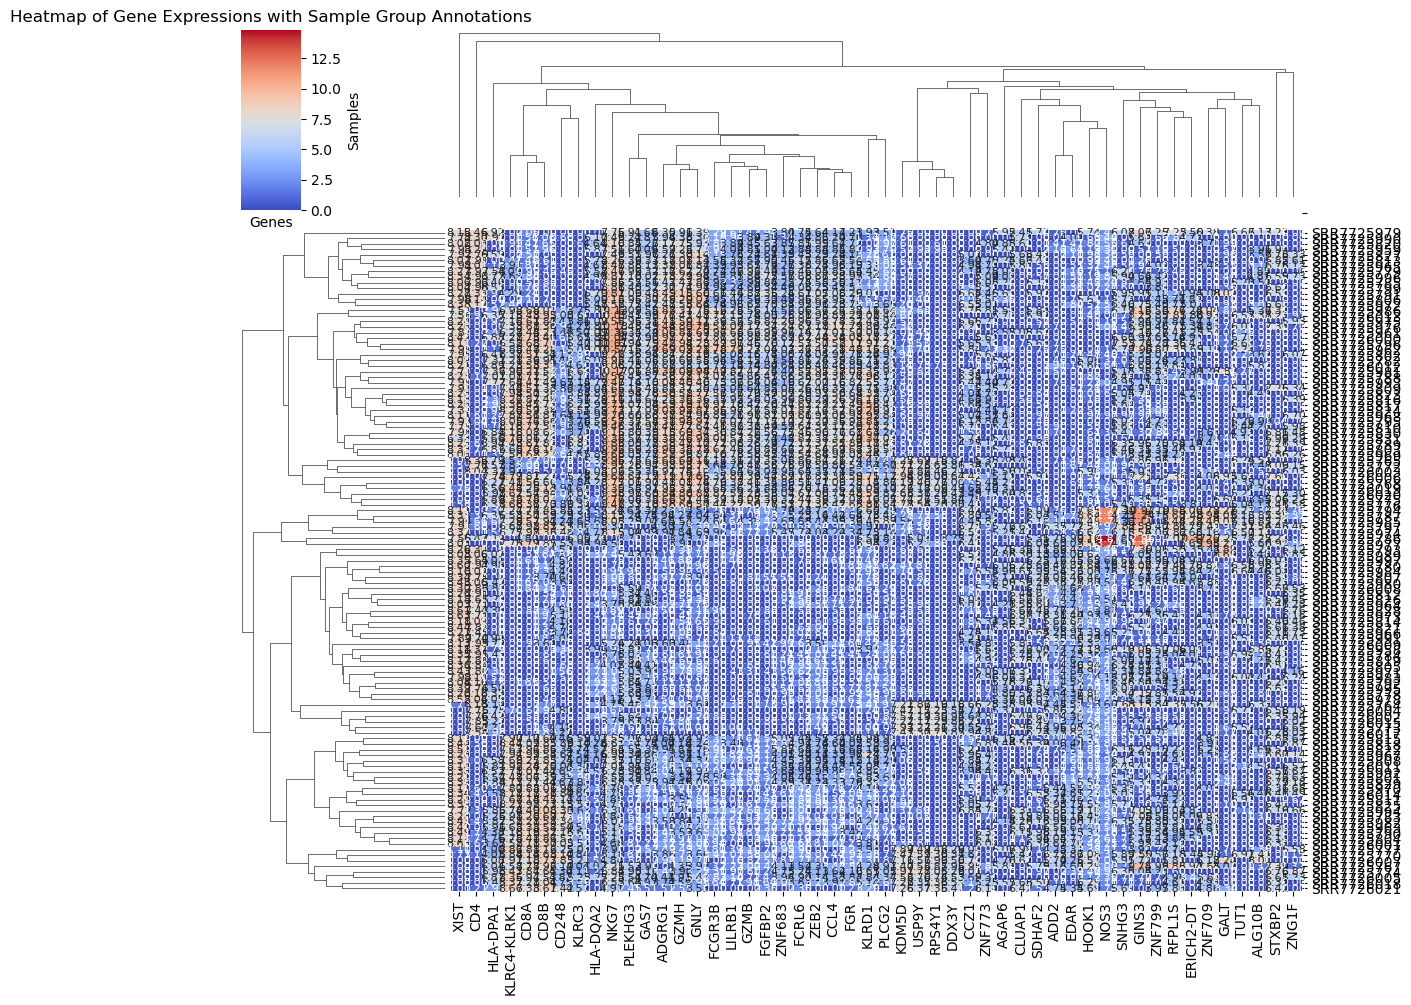

In [51]:
genes_to_use = X.columns[:50]  # Change this to include your selected predictive genes

# Subset the dataset for the selected genes
X_selected = X[genes_to_use]

# Perform hierarchical clustering on rows and columns
row_linkage = linkage(X_selected, method='average')
col_linkage = linkage(X_selected.T, method='average')

# Set up the plot
plt.figure(figsize=(10, 8))

# Create the heatmap with dendrograms and annotations
sns.clustermap(X_selected, 
               row_linkage=row_linkage, 
               col_linkage=col_linkage, 
               figsize=(12, 10),
               cmap='coolwarm',  # Change color map as needed
               annot=True,  # Optional: if you want to show the values on the heatmap
               fmt=".2f",  # Decimal format for annotations
               xticklabels=X_selected.columns, 
               yticklabels=df['refinebio_accession_code'],
               annot_kws={'size': 8},
               col_colors=pd.Series(y_group_encoded).map({0: 'blue', 1: 'orange'}),  # Color samples based on their group
               cbar_kws={"label": "Gene Expression"},  # Label for the color bar
               )
# Add axis labels and title
plt.title('Heatmap of Gene Expressions with Sample Group Annotations')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.show()